## Get static program features of bowtie and cd-hit-dup

In [1]:
header='ft1 ft2 ft3 ft4 ft5 ft6 ft7 ft8 ft9 ft10 ft11 ft12 ft13 ft14 ft15 ft16 ft17 ft18 ft24 ft25 ft19 ft39 ft20 ft33 ft21 ft35 ft22 ft23 ft34 ft36 ft37 ft38 ft40 ft41 ft42 ft43 ft44 ft45 ft46 ft48 ft47 ft49 ft51 ft50 ft52 ft53 ft54 ft55 ft26 ft27 ft28 ft29 ft30 ft31 ft32'

In [2]:
import pandas as pd

def value(item):
    return item[item.find('=')+1:]

df = pd.read_table('cd-hit-dup_features.txt', header=None, delimiter=',',
                   converters={i:value for i in range(55)},
                   names=header.split())

bowtie_ft = pd.read_table('bowtie_features.txt', header=None, delimiter=',',
                   converters={i:value for i in range(55)},
                   names=header.split())

bowtie_ft = bowtie_ft.astype(float)
bowtie_ft

,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,ft9,ft10,...,ft53,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32
0,4267.0,1648.0,2153.0,15.0,2843.0,847.0,357.0,1291.0,1403.0,245.0,...,219.0,3626.0,18.0,79.11,210.87,595.0,529.0,2923.0,9.0,1115.0


In [3]:
df = df.astype(float)

In [4]:
df

,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,ft9,ft10,...,ft53,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32
0,341.0,106.0,94.0,0.0,168.0,68.0,11.0,94.0,46.0,9.0,...,1.0,160.0,0.0,19.89,51.20,55.0,20.0,172.0,5.0,70.0
1,415.0,154.0,164.0,1.0,242.0,75.0,34.0,126.0,107.0,26.0,...,5.0,214.0,0.0,11.95,42.52,84.0,11.0,256.0,14.0,81.0
2,352.0,142.0,172.0,0.0,213.0,103.0,18.0,97.0,108.0,40.0,...,3.0,267.0,1.0,9.27,19.65,61.0,51.0,222.0,2.0,110.0
3,1950.0,797.0,945.0,0.0,1218.0,518.0,86.0,588.0,580.0,179.0,...,65.0,1497.0,2.0,42.99,83.77,502.0,143.0,1177.0,7.0,638.0


In [5]:
rowsum = df.sum(axis=0)

In [6]:
data = [d for d in rowsum.values]
cols = [c for c in rowsum.index]

In [7]:
dup_ft = pd.DataFrame(columns=cols) #create empty dataframe

In [8]:
dup_ft.loc[0] = data #add one row

In [9]:
dup_ft

,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,ft9,ft10,...,ft53,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32
0,3058.0,1199.0,1375.0,1.0,1841.0,764.0,149.0,905.0,841.0,254.0,...,74.0,2138.0,3.0,84.1,197.14,702.0,225.0,1827.0,28.0,899.0


## Bowtie: DF1 = Append to CPU, DataSize
## DUP:      DF2 = Append to CPU, DataSize
## Add totaltime column to both DF1, DF2
## DF1 U DF2
## Model Training to predict totaltime (57 features)

In [10]:
# read DUP ppn, size, Ytime from csv
dup_ppn_size_time = pd.read_csv('22July_dup_ppn_sizeGB_Ytime.csv')
del dup_ppn_size_time['Unnamed: 0']
dup_ppn_size_time.head(2)

,ppn,sizeGB,Y_time
0,11,1.2,45.82
1,11,1.7,67.97


In [11]:
rows = dup_ppn_size_time.shape[0]
rows

32

In [12]:
# create dataframe from DUP static program features with same #ROWs
frames = [dup_ft for i in range(rows)]
DUP_program_ft = pd.concat(frames)
DUP_program_ft.reset_index(inplace=True)
del DUP_program_ft['index']
DUP_program_ft.shape

(32, 55)

In [13]:
# read BOWTIE ppn, size, YTime from csv
bowtie_ppn_size_time = pd.read_csv('22July_BOWTIE_ppn_sizeGB_Ytime.csv')
del bowtie_ppn_size_time['Unnamed: 0']
bowtie_ppn_size_time.head(2)

,ppn,sizeGB,Y_time
0,11,0.56,841.52
1,11,0.56,828.67


In [14]:
rows = bowtie_ppn_size_time.shape[0]
rows

64

In [15]:
# create dataframe from BOWTIE static program features with same #ROWS
frames = [bowtie_ft for i in range(rows)]
BOWTIE_program_ft = pd.concat(frames)
BOWTIE_program_ft.reset_index(inplace=True)
del BOWTIE_program_ft['index']
BOWTIE_program_ft.shape

(64, 55)

In [16]:
DUP_ft_concat = pd.concat([dup_ppn_size_time, DUP_program_ft], axis=1, join_axes=[dup_ppn_size_time.index])
DUP_ft_concat['y_time']=DUP_ft_concat['Y_time']
del DUP_ft_concat['Y_time']
DUP_ft_concat.shape

(32, 58)

In [17]:
BOWTIE_ft_concat = pd.concat([bowtie_ppn_size_time, BOWTIE_program_ft], axis=1, 
                            join_axes=[bowtie_ppn_size_time.index])

BOWTIE_ft_concat['y_time']=BOWTIE_ft_concat['Y_time']
del BOWTIE_ft_concat['Y_time']
BOWTIE_ft_concat.shape

(64, 58)

In [18]:
# union DUP_ft_concat, BOWTIE_ft_concat
frames = [DUP_ft_concat, BOWTIE_ft_concat]
dup_bowtie = pd.concat(frames)
dup_bowtie.reset_index(inplace=True)
del dup_bowtie['index']
dup_bowtie.head(2)

,ppn,sizeGB,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,...,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32,y_time
0,11,1.2,3058.0,1199.0,1375.0,1.0,1841.0,764.0,149.0,905.0,...,2138.0,3.0,84.1,197.14,702.0,225.0,1827.0,28.0,899.0,45.82
1,11,1.7,3058.0,1199.0,1375.0,1.0,1841.0,764.0,149.0,905.0,...,2138.0,3.0,84.1,197.14,702.0,225.0,1827.0,28.0,899.0,67.97


In [19]:
dup_bowtie.columns[0:57]

Index(['ppn', 'sizeGB', 'ft1', 'ft2', 'ft3', 'ft4', 'ft5', 'ft6', 'ft7', 'ft8',
       'ft9', 'ft10', 'ft11', 'ft12', 'ft13', 'ft14', 'ft15', 'ft16', 'ft17',
       'ft18', 'ft24', 'ft25', 'ft19', 'ft39', 'ft20', 'ft33', 'ft21', 'ft35',
       'ft22', 'ft23', 'ft34', 'ft36', 'ft37', 'ft38', 'ft40', 'ft41', 'ft42',
       'ft43', 'ft44', 'ft45', 'ft46', 'ft48', 'ft47', 'ft49', 'ft51', 'ft50',
       'ft52', 'ft53', 'ft54', 'ft55', 'ft26', 'ft27', 'ft28', 'ft29', 'ft30',
       'ft31', 'ft32'],
      dtype='object')

In [20]:
ft0 = dup_bowtie.copy(deep=True)

In [21]:
import numpy as np
ft1=ft0.iloc[np.random.permutation(len(ft0))]
ft=ft1.reset_index(drop=True)
ft.shape

(96, 58)

### ft_all

In [22]:
ft_all = ft.copy(deep=True) #store a copy - do not change this later

In [23]:
features = ft.columns[0:57]
target = ft.columns[57]
features

Index(['ppn', 'sizeGB', 'ft1', 'ft2', 'ft3', 'ft4', 'ft5', 'ft6', 'ft7', 'ft8',
       'ft9', 'ft10', 'ft11', 'ft12', 'ft13', 'ft14', 'ft15', 'ft16', 'ft17',
       'ft18', 'ft24', 'ft25', 'ft19', 'ft39', 'ft20', 'ft33', 'ft21', 'ft35',
       'ft22', 'ft23', 'ft34', 'ft36', 'ft37', 'ft38', 'ft40', 'ft41', 'ft42',
       'ft43', 'ft44', 'ft45', 'ft46', 'ft48', 'ft47', 'ft49', 'ft51', 'ft50',
       'ft52', 'ft53', 'ft54', 'ft55', 'ft26', 'ft27', 'ft28', 'ft29', 'ft30',
       'ft31', 'ft32'],
      dtype='object')

In [24]:
target

'y_time'

### Take out 10% for validation. minimize over train-test, finally validate over the 10%

#### Validation Set

In [82]:
from sklearn.cross_validation import train_test_split

#copy from ft_all
ft0 =ft_all.copy(deep=True)

#shuffle
ft1 =ft0.iloc[np.random.permutation(len(ft0))]
ft2  =ft1.reset_index(drop=True)
ft2.head(2)

,ppn,sizeGB,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,...,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32,y_time
0,11,0.56,4267.0,1648.0,2153.0,15.0,2843.0,847.0,357.0,1291.0,...,3626.0,18.0,79.11,210.87,595.0,529.0,2923.0,9.0,1115.0,828.67
1,5,0.56,4267.0,1648.0,2153.0,15.0,2843.0,847.0,357.0,1291.0,...,3626.0,18.0,79.11,210.87,595.0,529.0,2923.0,9.0,1115.0,867.67


In [83]:
#Generate Validation Set: split ft2

ft_subset, validationSet = train_test_split(ft2, test_size = 0.1)
ft = ft_subset.copy(deep=True)

ft.shape, validationSet.shape, ft_all.shape
#both test and train are taken from ft

((86, 58), (10, 58), (96, 58))

Automatically created module for IPython interactive environment
Optimal number of features : 25


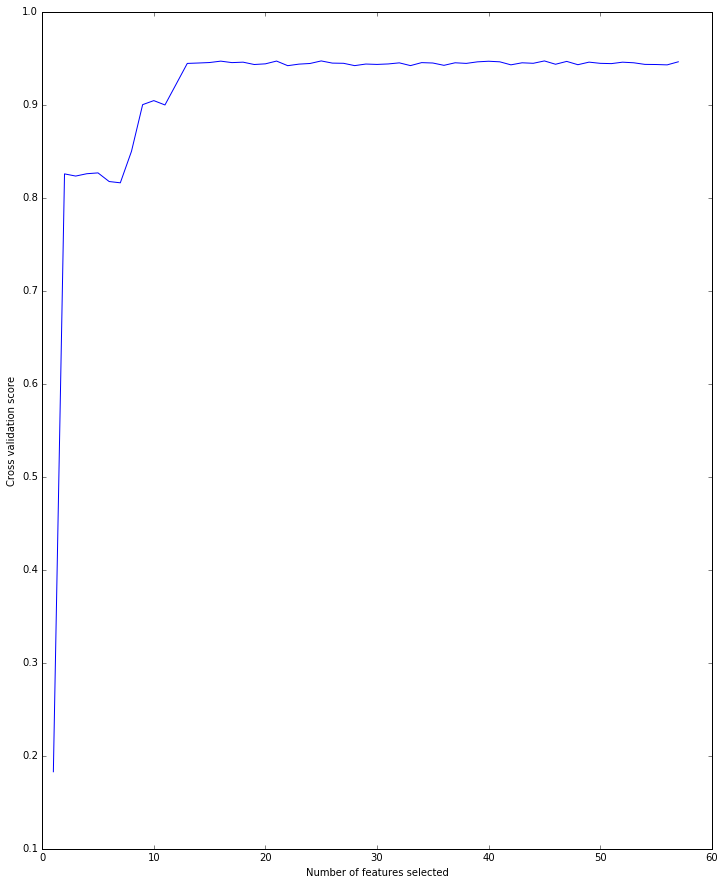

In [84]:
#Perform RFECV on ft and use validationSet for calculating rmse

%matplotlib inline
from sklearn.ensemble.forest import RandomForestRegressor

print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

data = ft.copy(deep=True) #ft_all = ft + validationSet 
X = data[features]
y = data[target].values

model = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
rfecv = RFECV(model, step=1, cv=10) #remove 1 feature at each step
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(12, 15))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [85]:
rfecv.n_features_

25

In [86]:
X.columns[rfecv.support_]

Index(['ppn', 'sizeGB', 'ft3', 'ft6', 'ft7', 'ft13', 'ft17', 'ft24', 'ft39',
       'ft20', 'ft35', 'ft23', 'ft34', 'ft36', 'ft41', 'ft43', 'ft45', 'ft46',
       'ft48', 'ft49', 'ft51', 'ft26', 'ft27', 'ft29', 'ft30'],
      dtype='object')

In [87]:
X_val = validationSet[features]
y_val = validationSet[target].values

rfecv.score(X_val, y_val) #Reduce X to the selected features and then return the score of the underlying estimator.

0.99928790892520825

In [88]:
y_predict = rfecv.predict(X_val) #Reduce X to the selected features and then predict using the underlying estimator.

from sklearn.metrics import mean_squared_error

rmse_rfecv = np.sqrt(mean_squared_error(y_val, y_predict))
rmse_rfecv

32.217903942033431

In [89]:
y_val

array([  142.07,  1274.14,    21.8 ,  2858.61,  2150.65,    98.47,
         120.44,    45.94,  3373.84,  1301.71])

In [90]:
y_predict

array([  139.72116   ,  1224.72801683,    24.45128   ,  2923.67746722,
        2145.88821697,    96.14211333,   123.12892   ,    45.50292   ,
        3352.99985257,  1244.94521401])

In [91]:
#save RFECV Model

import pickle as cPickle
with open('rfecv_E4.pkl', 'wb') as fid:
    cPickle.dump(rfecv, fid)
with open('rfecv_model_E4.pkl', 'wb') as fid:
    cPickle.dump(model, fid)